<a href="https://colab.research.google.com/github/linlills/NeuralNetworks/blob/main/Vdovina_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split

%matplotlib inline 

x = np.array([15.,15.,15.,18.,28.,29.,37.,37.,44.,50.,50.,60.,61.,64.,65.,65.,72.,75.,75.,82.,85.,91.,91.,97.,98.,125.,142.,142.,147.,147.,150.,159.,165.,183.,192.,195.,218.,218.,219.,224.,225.,227.,232.,232.,237.,246.,258.,276.,285.,300.,301.,305.,312.,317.,338.,347.,354.,357.,375.,394.,513.,535.,554.,591.,648.,660.,705.,723.,756.,768.,860.])
y = np.array([21.66,22.75,22.3,31.25,44.79,40.55,50.25,46.88,52.03,63.47,61.13,81,73.09,79.09,79.51,65.31,71.9,86.1,94.6,92.5,105,101.7,102.9,110,104.3,134.9,130.68,140.58,155.3,152.2,144.5,142.15,139.81,153.22,145.72,161.1,174.18,173.03,173.54,178.86,177.68,173.73,159.98,161.29,187.07,176.13,183.4,186.26,189.66,186.09,186.7,186.8,195.1,216.41,203.23,188.38,189.7,195.31,202.63,224.82,203.3,209.7,233.9,234.7,244.3,231,242.4,230.77,242.57,232.12,246.7])

# разделение набора данных на обучающий и тестовый
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) #случайный способ извлечь подмножество данных, чтобы получить сбалансированное распределение в наборе обучения и проверки

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
# нормализация данных
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(1,))) #
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) # одномерный линейный слой

print(model.summary())

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # функция потерь - среднеквадратичная ошибка, mae-средняя абсолютная ошибка

history = model.fit(x_train, y_train, epochs=1000, batch_size=1, validation_split=0.1, verbose=0) # validation_split - неизменный набор данных проверки 

pred = model.predict(x_test).flatten() 

# Средний модуль отклонения 
err = np.mean(abs(pred - y_test))
print('Средний модуль отклонения: ')
print(err) 
print('Среднее значение в тестовой выборке: ')
print(np.mean(y_test)) 

for i in range(len(pred)):
  print("Предсказание сети: ", round(pred[i],2), ", значение выборки: ", round(y_test[i],2), ", разница: ", round(pred[i] - y_test[i],2));


(49,) (49,)
(22,) (22,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              2000      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                64064     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 66,129
Trainable params: 66,129
Non-trainable params: 0
_________________________________________________________________
None
Средний модуль отклонения: 
8.804041952653366
Среднее значение в тестовой выборке: 
131.46318181818182
Предсказание сети:  100.0 , значение выборки:  102.9 , разница:  -2.9
Предсказание сети:  25.03 , значение выборки:  21.66 , разница:  3.37
Предсказание сети:  194.44 , значение выборки:  186.09 , разница:  8.35
Предсказание сети:  36.27 , значение в

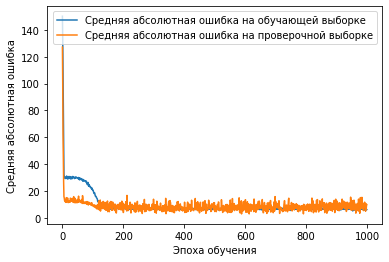

In [ ]:
# Графики ошибки
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающей выборке')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочной выборке')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

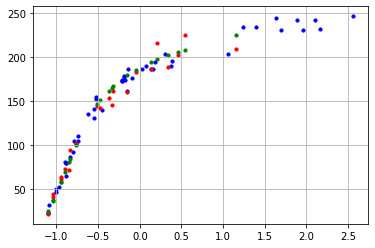

In [ ]:
plt.scatter(x_train, y_train, s=10, c='blue') # обучающий
plt.scatter(x_test, y_test, s=10, c='red')  # тестовый
plt.scatter(x_test, pred, s=10, c='green')  # предсказание
plt.grid(True)
plt.show()